In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

## Задание 1

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

### Задание 1.1

Скачать данные в закрепе к уроку

In [2]:
df = pd.read_csv("kc_house_data.csv")

### Задание 1.2

Изучите стоимости недвижимости

In [3]:
df['price'].describe().round()

count      21613.0
mean      540088.0
std       367127.0
min        75000.0
25%       321950.0
50%       450000.0
75%       645000.0
max      7700000.0
Name: price, dtype: float64

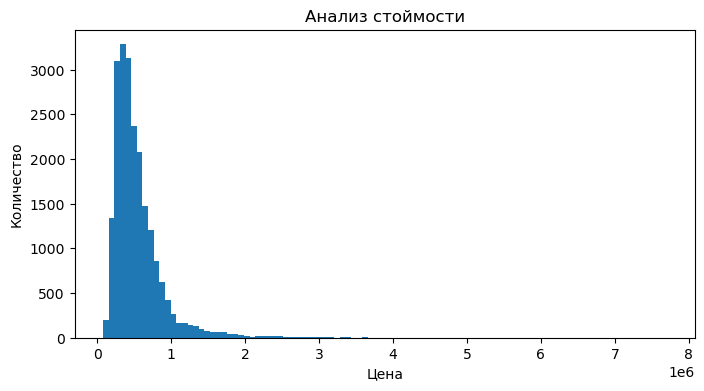

In [4]:
plt.figure(figsize=(8, 4))
plt.hist(df['price'], bins=100)
plt.title('Анализ стоймости')
plt.ylabel('Количество')
plt.xlabel('Цена')
plt.show()


Вывод: Средняя цена ~500 000 у.е

### Задание 1.3

Изучите распределение квадратуры жилой

In [5]:
df['sqft_living'].describe().round()

count    21613.0
mean      2080.0
std        918.0
min        290.0
25%       1427.0
50%       1910.0
75%       2550.0
max      13540.0
Name: sqft_living, dtype: float64

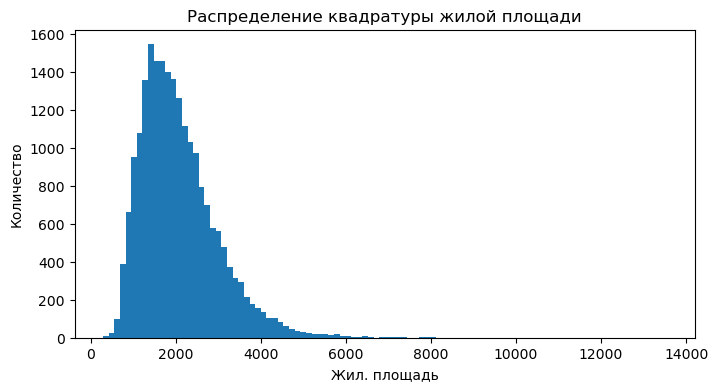

In [6]:
plt.figure(figsize=(8, 4))
plt.hist(df['sqft_living'], bins=100)
plt.title('Распределение квадратуры жилой площади')
plt.ylabel('Количество')
plt.xlabel('Жил. площадь')
plt.show()

Вывод: Средняя жилая площадь ~2 000 футов.

### Задание 1.4

Изучите распределение года постройки

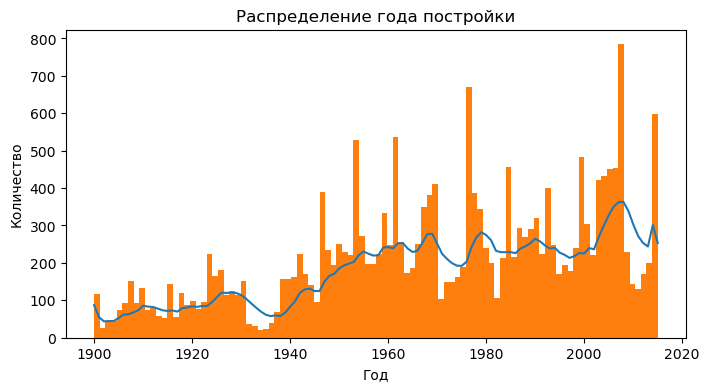

In [7]:
plt.figure(figsize=(8, 4))
plt.plot(df['yr_built'].value_counts().sort_index().ewm(span=10).mean())
plt.hist(df['yr_built'], bins=100)
plt.title('Распределение года постройки')
plt.ylabel('Количество')
plt.xlabel('Год')
plt.show()

Вывод: на графике видна возрастающая регрессия.

## Задание 2

### Задание 2.1

- Изучите распределение домов от наличия вида на набережную
- Постройте график
- Сделайте выводы

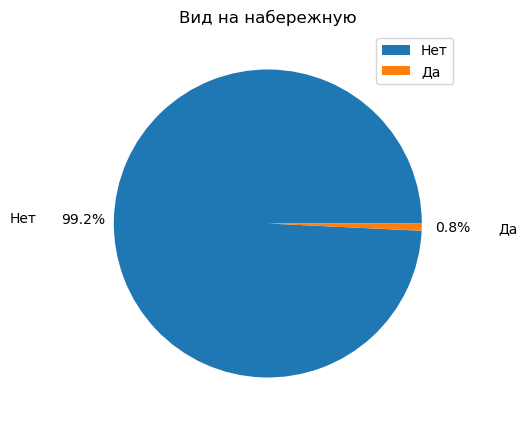

In [8]:
plt.figure(figsize=(5, 5))
plt.pie(
    df["waterfront"].value_counts(),
    autopct="%1.1f%%",
    pctdistance=1.2,
    labels=["Нет", "Да"],
    labeldistance=1.5   
)
plt.legend(["Нет", "Да"], loc='upper right');
plt.title('Вид на набережную')
plt.show()

Вывод: Основное количество домов без вида на набережную.

### Задание 2.2

Изучите распределение этажей домов

In [9]:
df['floors'].describe()

count    21613.000000
mean         1.494309
std          0.539989
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [10]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

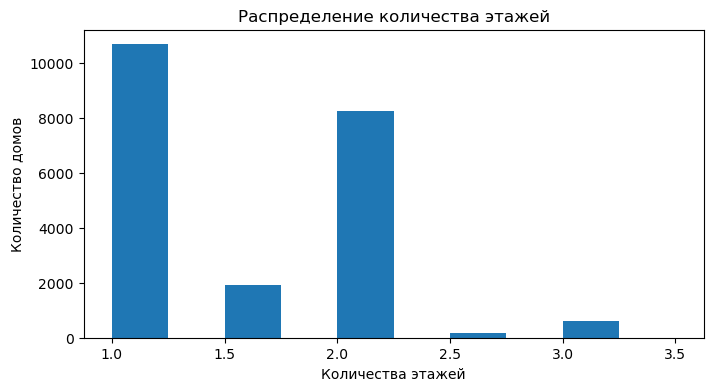

In [11]:
plt.figure(figsize=(8, 4))
plt.hist(df['floors'])
plt.title('Распределение количества этажей')
plt.ylabel('Количество домов')
plt.xlabel('Количества этажей')
plt.show()

Вывод: основная часть домов 1-2 этажа

### Задание 2.3

Изучите распределение состояния домов

In [12]:
df['condition'].describe()

count    21613.000000
mean         3.409430
std          0.650743
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

In [13]:
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

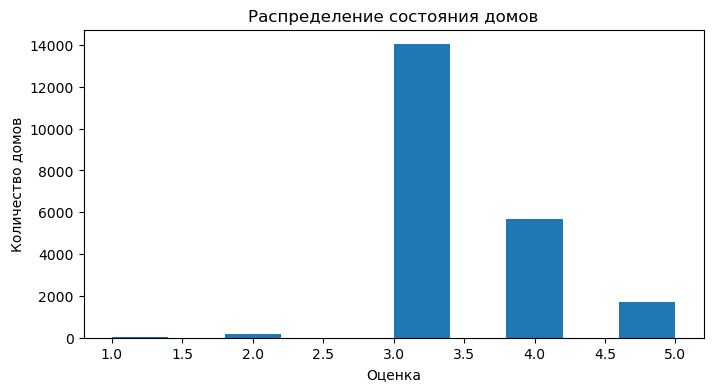

In [14]:
plt.figure(figsize=(8, 4))
plt.hist(df['condition'])
plt.title('Распределение состояния домов')
plt.ylabel('Количество домов')
plt.xlabel('Оценка')
plt.show()

Вывод: большинство домов имеют оценку 3 балла

## Задание 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [15]:
formule = "price ~ " + " + ".join(df.drop(columns=["date", "price", "id"]).columns)
result = smf.ols(formule, data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Thu, 27 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:27:25   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       6.69e+06   2.93e+06      2.282      0.022    9.44e+05    1.24e+07
bedrooms      -3.577e+04   1891.843    -18.906      0.000   -3.95e+04   -3.21e+04
bathrooms      4.114e+04   3253.678     12.645      0.000    3.48e+04    4.75e+04
sqft_living     110.4408      2.270     48.661      0.000     105.992     114.889
sqft_lot          0.1286      0.048      2.683      0.007       0.035       0.223
floors         6689.5501   3595.859      1.860      0.063    -358.599    1.37e+04
waterfront      5.83e+05   1.74e+04     33.580      0.000    5.49e+05    6.17e+05
view           5.287e+04   2140.055     24.705      0.000    4.87e+04    5.71e+04
condition      2.639e+04   2351.461     11.221      0.000    2.18e+04     3.1e+04
grade          9.589e+04   2152.789     44.542      0.000    9.17e+04       1e+05
sqft_above       70.7872      2.253     31.414      0.000      66.371      75.204
sqft_basement    39.6597      2.647     14.985      0.000      34.472      44.847
yr_built      -2620.2232     72.659    -36.062      0.000   -2762.640   -2477.806
yr_renovated     19.8126      3.656      5.420      0.000      12.647      26.978
zipcode        -582.4199     32.986    -17.657      0.000    -647.074    -517.765
lat            6.027e+05   1.07e+04     56.149      0.000    5.82e+05    6.24e+05
long          -2.147e+05   1.31e+04    -16.349      0.000    -2.4e+05   -1.89e+05
sqft_living15    21.6814      3.448      6.289      0.000      14.924      28.439
sqft_lot15       -0.3826      0.073     -5.222      0.000      -0.526      -0.239
==============================================================================
Omnibus:                    18384.201   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1868224.491
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      47.985   Cond. No.                     7.12e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.32e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Все характеристики кроме этажа, влияют на стоимость недвиджимости.

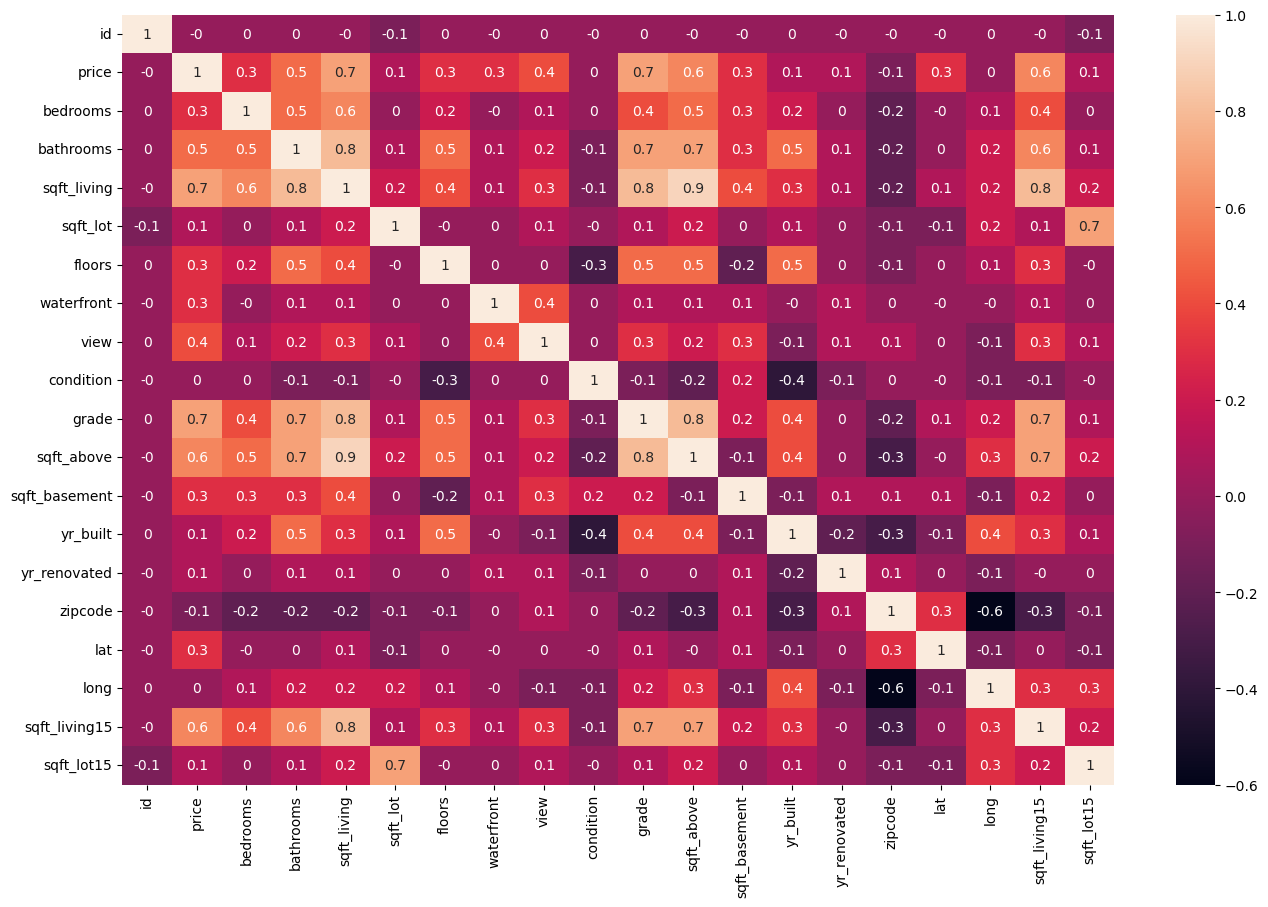

In [16]:
corr_matrix = df.corr().round(1)
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Больше всего на цену влияет характеристики: grade, sqft_living, sqft_living15, sqft_above, bathrooms. Все эти признаки коррелируют между собой.

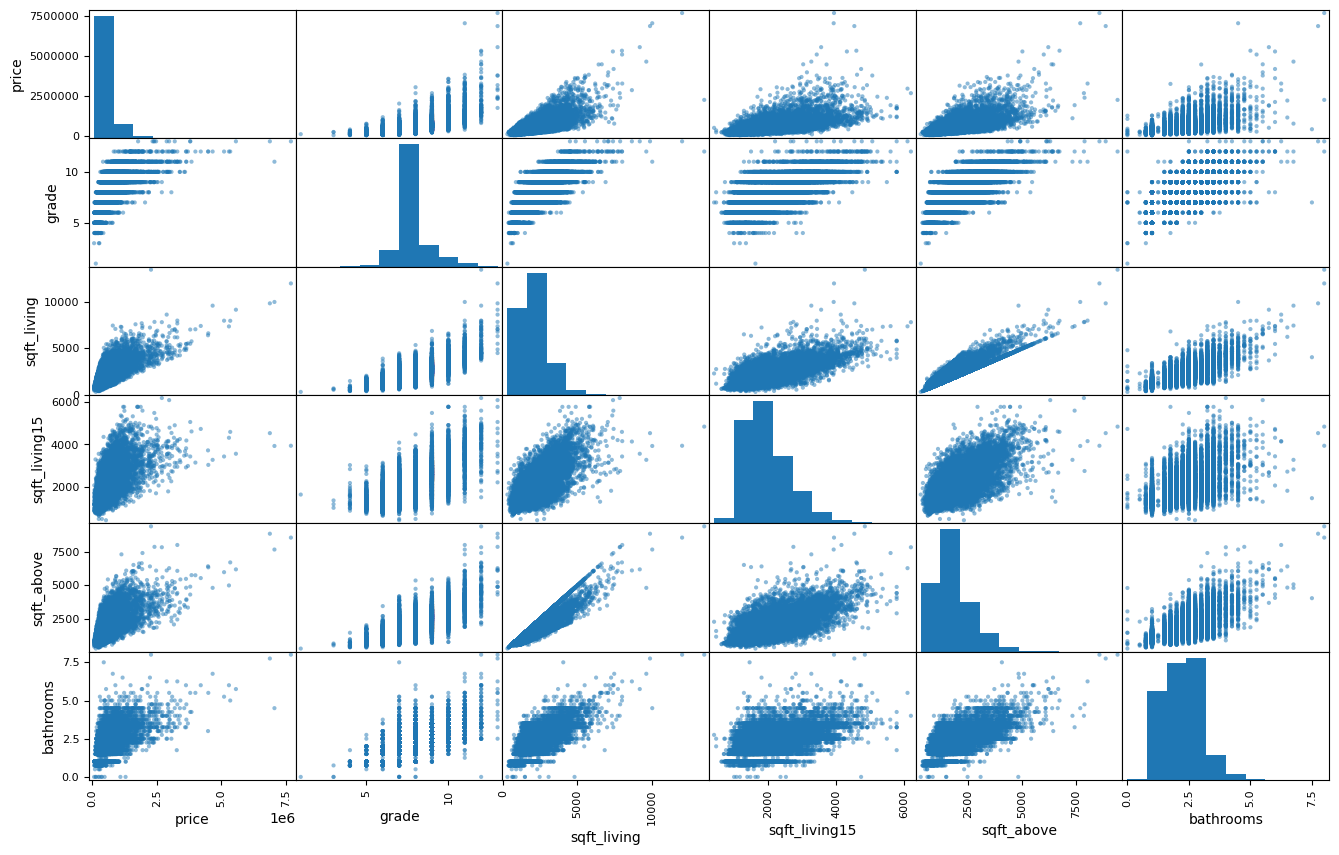

In [17]:
pd.plotting.scatter_matrix(df[["price", "grade", "sqft_living", "sqft_living15", "sqft_above", "bathrooms"]], figsize=(16,10))
plt.show()

Выбранные характеристики имеют прямую зависимость с ценой. По мере роста увеличивается диспресия цены.

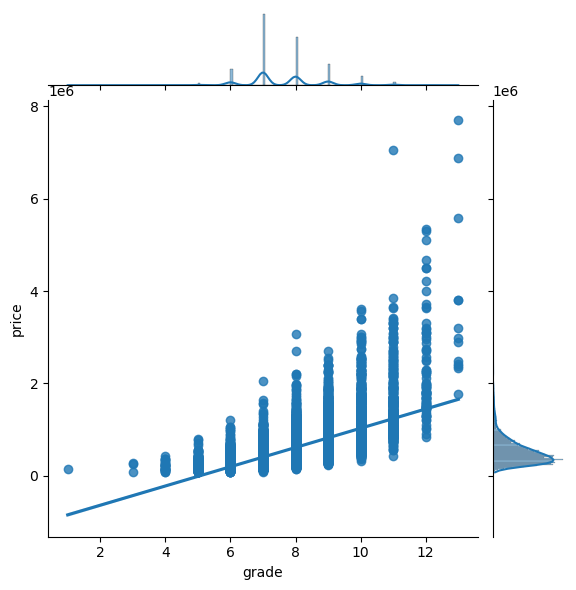

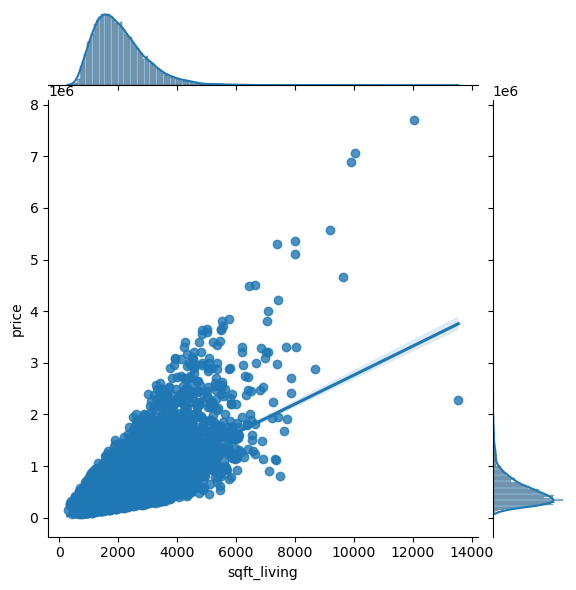

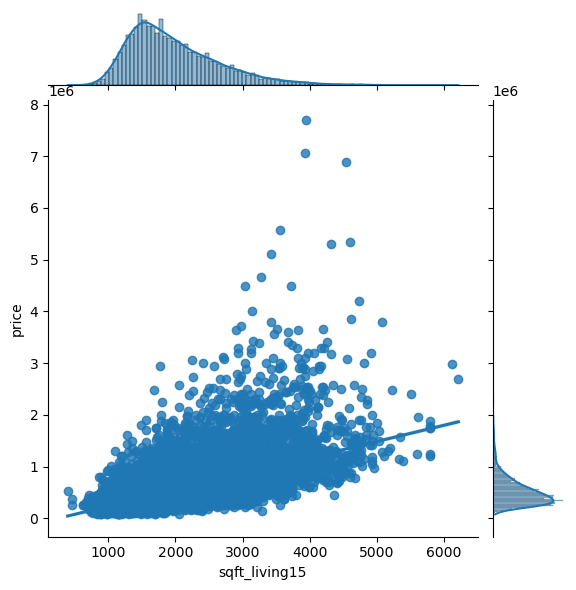

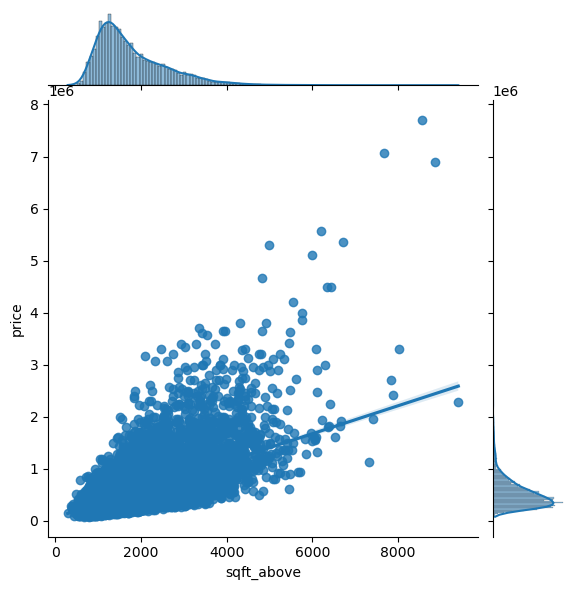

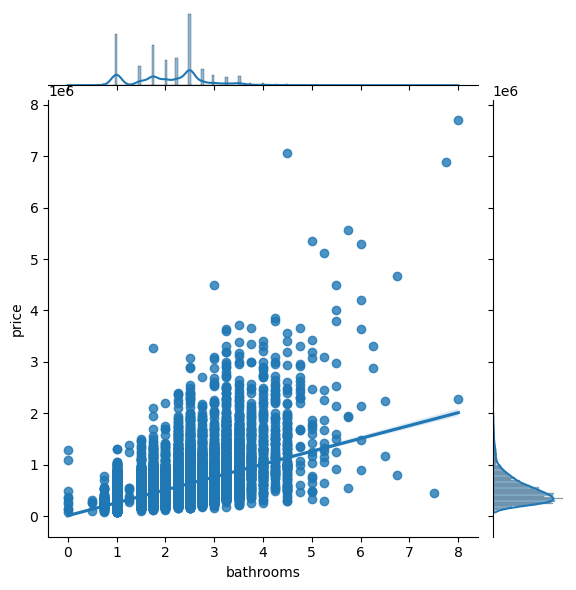

In [18]:
columns = ["grade", "sqft_living", "sqft_living15", "sqft_above", "bathrooms"]
for label in columns:
    sns.jointplot(x=label, y='price', data=df, kind="reg")
    plt.show()

Цена и характеристики сконцентрированы у нижних границ, за исключением grade.

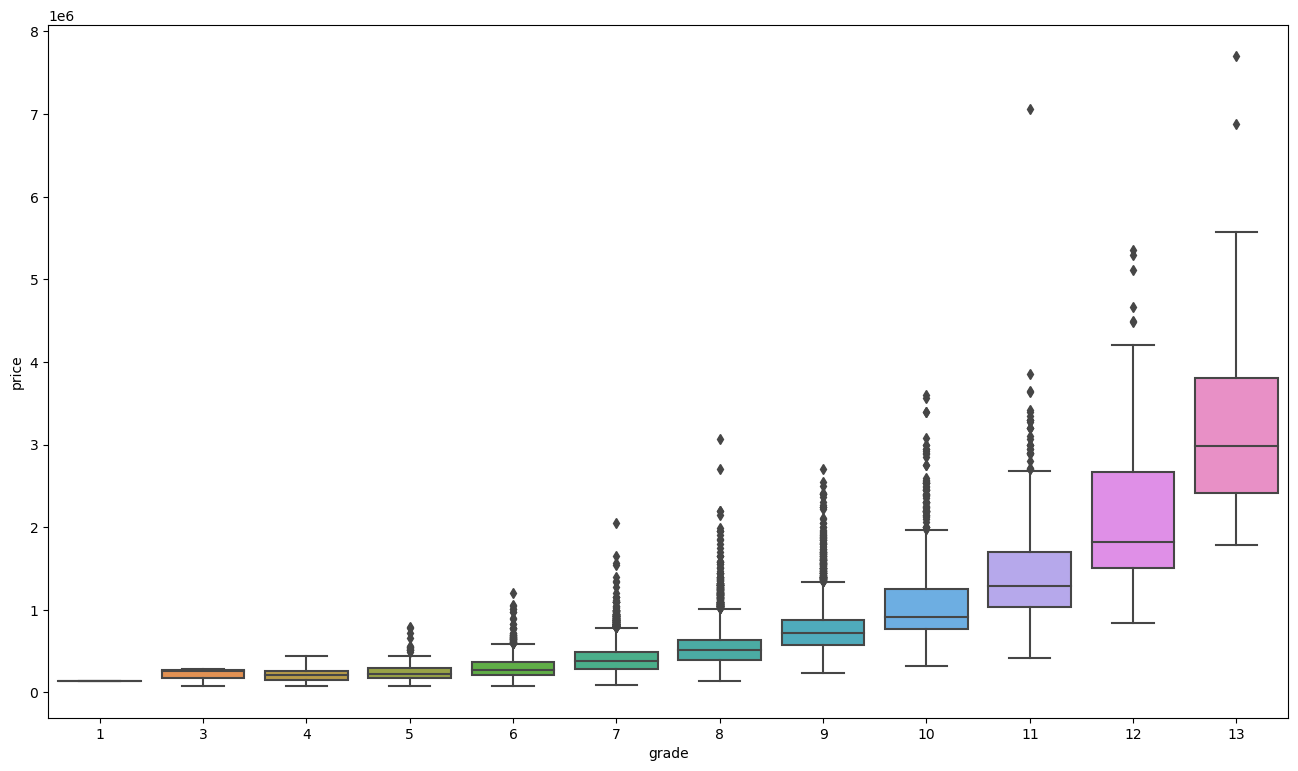

In [19]:
plt.figure(figsize=(16,9))
sns.boxplot(y=df["price"], x=df["grade"])
plt.show()

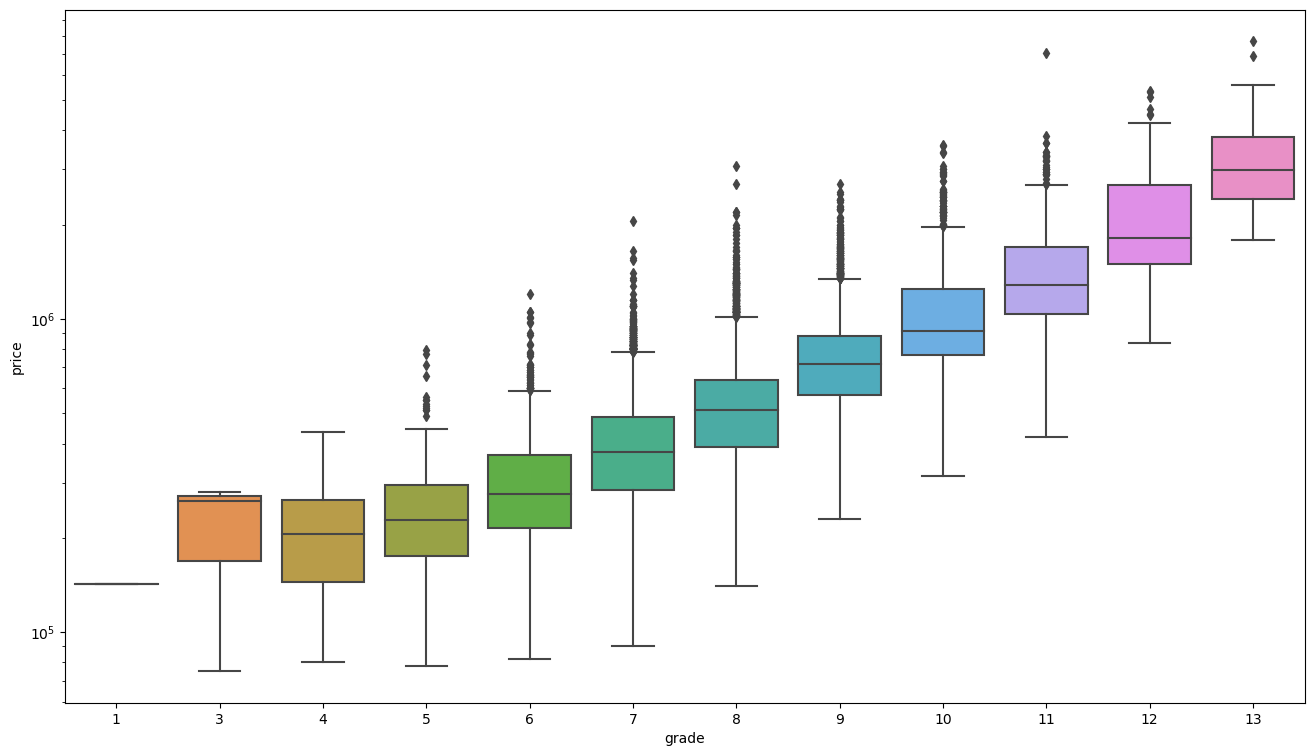

In [20]:
plt.figure(figsize=(16,9))
sns.boxplot(y=df["price"], x=df["grade"])
plt.yscale('log')
plt.show()

Из графика видно, что цена имеет логорифмическую зависимость от grade.

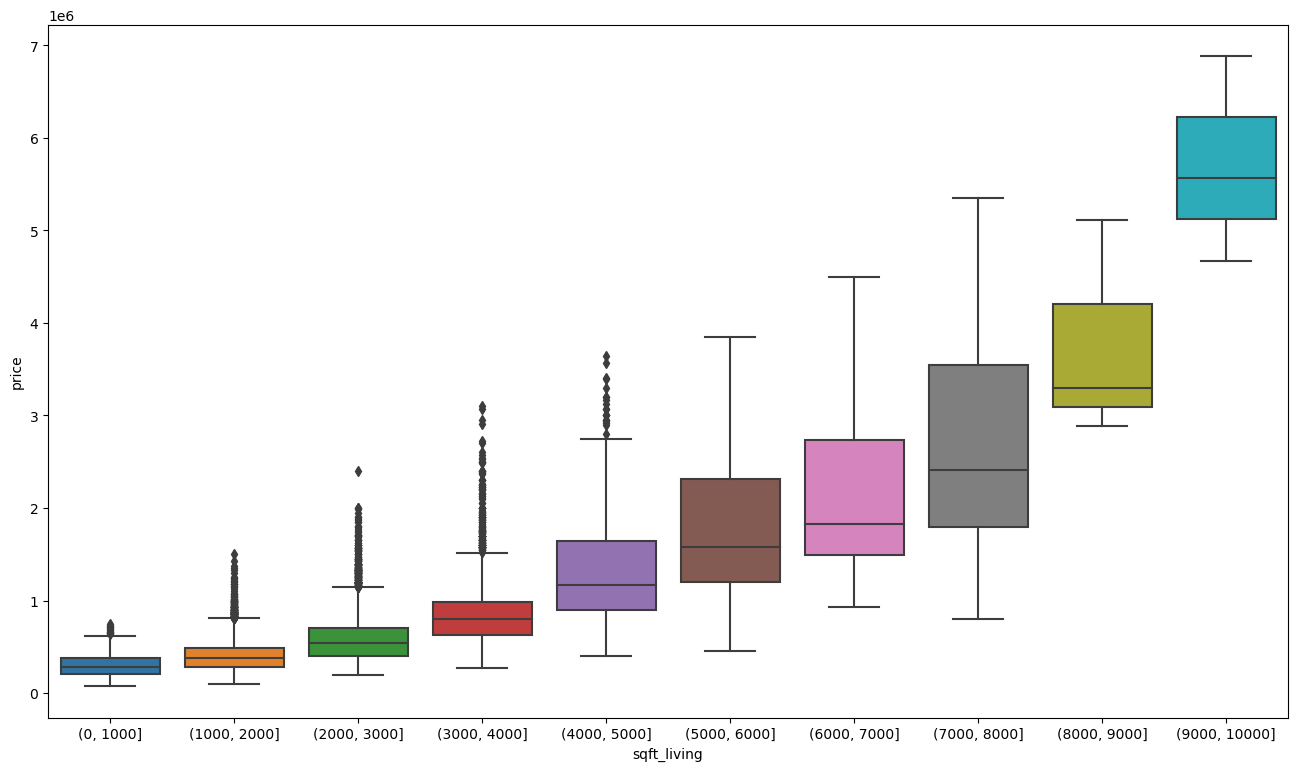

In [21]:
plt.figure(figsize=(16,9))
sns.boxplot(y=df["price"], x=pd.cut(df["sqft_living"], np.arange(0, 10001, 1000)))
plt.show()

Видна зависимость от площади.